<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 

Consequently, people who enjoy outdoor activities are often at the mercy of the weather.  

This project aims to identify climactic patterns  in Singapore so that Singaporeans are able to understand how best to plan their outdoor activities.  


## Problem Statement

One of the biggest headache with outdoor tennis is that we are mostly at mercy of the weather. We book the court, it rains, and we either have to forgo the booking or go through the troublesome process of seeking a refund. 

The objective of this research is to give tennis players a better idea of climactic patterns in Singapore so that they may use it to better plan their tennis court bookings.

In [1]:
# Create function to calculate mean:

numbers_list = [2,6,7,19,20]

# a = sum(numbers_list)

def get_mean(numbers:float):
    mean = sum(numbers)/len(numbers)
    return mean
    
get_mean(numbers_list)

10.8

In [2]:
# Create function to calculate standard deviation:

def get_stddev(numbers:float):
    mean = get_mean(numbers)
    sum_of_squares = 0
    for i in numbers:
        sum_of_squares += (i-mean)**2
    stdev = (sum_of_squares/len(numbers))**0.5
    return stdev


get_stddev(numbers_list)

7.30479294709987

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

In [3]:
# Imports:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.pyplot import show
from scipy.stats import gaussian_kde
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as mtick

## Data Import and Cleaning

In [4]:
# Importing Datasets

filepath = './data'
climate_db = {}
file_list = []

for file in os.listdir(filepath):
    if file == '.ipynb_checkpoints':
        continue
    if file.endswith('.csv'):
        name = file[:-4]
        file_list.append(name)
    climate_db[name] = pd.read_csv(f"{filepath}/{file}")
    print(name)

merged_humidity
merged_rainfall
rainfall-monthly-highest-daily-total
rainfall-monthly-number-of-rain-days
rainfall-monthly-total
relative-humidity-monthly-mean
sunshine-duration-monthly-mean-daily-duration
surface-air-temperature-monthly-mean
wbt_with_air
wet-bulb-temperature-hourly


In [5]:
# Print out First 5 rows of each dataset and its dtypes

for file in file_list:
    print(climate_db[file].head())
    print(climate_db[file].dtypes)


        month  mean_rh  mean_sunshine_hrs  mean_temp  mth  year
0  1982-01-01     81.2                5.6       25.9    1  1982
1  1982-02-01     79.5                7.6       27.1    2  1982
2  1982-03-01     82.3                5.1       27.2    3  1982
3  1982-04-01     85.9                4.7       27.0    4  1982
4  1982-05-01     83.2                5.8       28.0    5  1982
month                 object
mean_rh              float64
mean_sunshine_hrs    float64
mean_temp            float64
mth                    int64
year                   int64
dtype: object
        month  total_rainfall  maximum_rainfall_in_a_day  no_of_rainy_days  \
0  1982-01-01           107.1                       36.5                10   
1  1982-02-01            27.8                        9.4                 5   
2  1982-03-01           160.8                       61.7                11   
3  1982-04-01           157.0                       45.1                14   
4  1982-05-01           102.2         

In [6]:
# Check for any missing data

for file in file_list:
    print(climate_db[file].isnull().any())   # All False, so no missing data in the merged 

month                False
mean_rh              False
mean_sunshine_hrs    False
mean_temp            False
mth                  False
year                 False
dtype: bool
month                          False
total_rainfall                 False
maximum_rainfall_in_a_day      False
no_of_rainy_days               False
year                           False
mth                            False
average_rainfall_per_day       False
monthly_probability_of_rain    False
dtype: bool
month                        False
maximum_rainfall_in_a_day    False
dtype: bool
month               False
no_of_rainy_days    False
dtype: bool
month             False
total_rainfall    False
dtype: bool
month      False
mean_rh    False
dtype: bool
month                False
mean_sunshine_hrs    False
dtype: bool
month        False
mean_temp    False
dtype: bool
wbt_date                False
wbt_time                False
wet_bulb_temperature    False
mth                     False
year                    False


In [7]:
# Merge all Rainfall data by Month and Reindex to DatetimeIndex
rainfall = climate_db['rainfall-monthly-total'].merge(climate_db['rainfall-monthly-highest-daily-total'], on='month')
rainfall = rainfall.merge(climate_db['rainfall-monthly-number-of-rain-days'], on='month')
rainfall['month']=rainfall['month'].astype('datetime64[ns]')  # convert to datetime format
rainfall.set_index('month', inplace=True)

# Creating New Features
rainfall['year'] = rainfall.index.year
rainfall['mth'] = rainfall.index.month
rainfall['average_rainfall_per_day'] = rainfall['total_rainfall']/rainfall['no_of_rainy_days']

# Calculate probability of rain for each month
days_in_months = {1:31, 2:28, 3:31, 4:30, 5:31, 6:30, 7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
rainfall['monthly_probability_of_rain'] = rainfall['no_of_rainy_days']/(rainfall['mth'].map(lambda mth: days_in_months[mth]))

rainfall.to_csv(f"{filepath}/merged_rainfall.csv")
rainfall.describe()

,total_rainfall,maximum_rainfall_in_a_day,no_of_rainy_days,year,mth,average_rainfall_per_day,monthly_probability_of_rain
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,177.163730,52.332172,14.061475,2001.836066,6.467213,12.123057,0.461343
std,113.916029,35.746423,4.947394,11.752660,3.449095,5.920178,0.161066
min,0.200000,0.200000,1.000000,1982.000000,1.000000,0.200000,0.035714
25%,93.850000,30.675000,11.000000,1992.000000,3.000000,8.393421,0.354839
50%,159.450000,43.900000,14.000000,2002.000000,6.000000,11.164103,0.466667
75%,238.075000,63.050000,18.000000,2012.000000,9.000000,15.149918,0.580645
max,765.900000,216.200000,27.000000,2022.000000,12.000000,46.223077,0.900000


In [8]:
# Merge all Humidity data by Month and Reindex to DatetimeIndex
humidity = climate_db['relative-humidity-monthly-mean'].merge(climate_db['sunshine-duration-monthly-mean-daily-duration'], on='month').merge(climate_db['surface-air-temperature-monthly-mean'], on='month')
humidity['month']=humidity['month'].astype('datetime64[ns]')
humidity.set_index('month', inplace=True)

# Creating New Features
humidity['mth']=humidity.index.month
humidity['year'] = humidity.index.year

humidity.to_csv(f"{filepath}/merged_humidity.csv")
humidity.describe()

,mean_rh,mean_sunshine_hrs,mean_temp,mth,year
count,491.000000,491.000000,491.000000,491.000000,491.000000
mean,82.224644,5.676171,27.678615,6.488798,2001.959267
std,3.417366,1.212024,0.799905,3.450137,11.821736
min,72.000000,2.700000,25.400000,1.000000,1982.000000
25%,79.900000,4.800000,27.100000,3.500000,1992.000000
50%,82.600000,5.600000,27.700000,6.000000,2002.000000
75%,84.650000,6.450000,28.300000,9.000000,2012.000000
max,90.700000,9.300000,29.500000,12.000000,2022.000000


In [9]:
# Read Wet Bulb Temperature data and Reindex to DatetimeIndex
wbt = climate_db['wet-bulb-temperature-hourly'].copy()  # make copy to avoid inplace changes to original dataset
wbt['wbt_date']=wbt['wbt_date'].astype('datetime64[ns]')
wbt.set_index('wbt_date', inplace=True)

# Creating New Features
wbt['mth'] = wbt.index.month
wbt['year'] = wbt.index.year

# Merge wbt with humidity data 
surface_air_temp = humidity[['mean_temp', 'mth', 'year']]
wbt_with_air = wbt.merge(surface_air_temp, on=['mth', 'year'])

# Compare differences between wbt and surface air temp for checking air humidity conditions
wbt_with_air['bulb_minus_air_temp'] = wbt_with_air['wet_bulb_temperature']-wbt_with_air['mean_temp']

# Merging wbt with surface_air_temp removed wbt's index. Reindexed back again.
wbt_with_air['wbt_date'] = wbt.index
wbt_with_air.set_index('wbt_date', inplace=True)


wbt_with_air.to_csv(f"{filepath}/wbt_with_air.csv")

wbt_with_air.describe()

,wbt_time,wet_bulb_temperature,mth,year,mean_temp,bulb_minus_air_temp
count,358656.000000,358656.000000,358656.000000,358656.000000,358656.000000,358656.000000
mean,12.499933,25.257366,6.511643,2001.958512,27.679604,-2.422238
std,6.922201,1.022259,3.443219,11.809063,0.800401,0.975224
min,0.000000,15.300000,1.000000,1982.000000,25.400000,-12.600000
25%,6.000000,24.600000,4.000000,1992.000000,27.100000,-3.100000
50%,12.000000,25.300000,7.000000,2002.000000,27.700000,-2.400000
75%,18.000000,26.000000,10.000000,2012.000000,28.300000,-1.800000
max,24.000000,29.300000,12.000000,2022.000000,29.500000,1.300000


### Data Dictionary

|Feature|Data Type|Unit|Dataset|Description|Data Source|
|:---|---|:---:|---|---:|---|
|total_rainfall|float|mm|merged_rainfall|Total rainfall|rainfall-monthly-total
|maximum_rainfall_in_a_day|float|mm|merged_rainfall|Maximum rainfall in a day|rainfall-monthly-highest-daily-total
|no_of_rainy_days|int|days|merged_rainfall|Number of rainy days|rainfall-monthly-number-of-rain-days
|year|int|Numeric(General)|merged_rainfall|Year for which data was taken, from 1982 to 2022|
|mth|int|Numeric(General)|merged_rainfall|Month for which data was taken, from 1 to 12| 
|average_rainfall_per_day|float|mm|merged_rainfall|Total Rainfall/Number of rainy days in the month|
|monthly_probability_of_rain|float|Decimal(Percentage)|merged_rainfall|Number of rainy days in the month/Number of calendar days in the month|
|mean_rh|float|Numeric(Percentage)|merged_humidity|Monthly mean relative humidity|relative-humidity-monthly-mean
|mean_sunshine_hrs|float|Hour|merged_humidity|Monthly Mean Daily Sunshine Duration|sunshine-duration-monthly-mean-daily-duration
|mean_temp|float|Degree Celsius|merged_humidity|Monthly Mean Daily Minimum Temperature|surface-air-temperature-monthly-mean
|year|int|Numeric(General)|merged_humidity|Year for which data was taken, from 1982-2022| 
|mth|int|Numeric(General)|merged_humidity|Month for which data was taken, from 1 to 12|
|wbt_time|int|Hour|wbt_with_air|the hour is from 1 to 24|wet-bulb-temperature-hourly
|wet_bulb_temperature|float|Degree Celsius|wbt_with_air|Wet Bulb Temperature-Hourly|wet-bulb-temperature-hourly
|year|int|Numeric(General)|wbt_with_air|Year for which data was taken, from 1982-2022| 
|mth|int|Numeric(General)|wbt_with_air|Month for which data was taken, from 1 to 12|
|mean_temp|float|Degree Celsius|wbt_with_air|Monthly Mean Daily Minimum Temperature|surface-air-temperature-monthly-mean
|bulb_minus_air_temp|float|Degree Celsius|wbt_with_air|Hourly difference between wet bulb and monthly mean surface air temperature|

In [10]:
# Summary Statistics for each newly created dataset

rainfall.describe()
humidity.describe()
wbt_with_air.describe()

,wbt_time,wet_bulb_temperature,mth,year,mean_temp,bulb_minus_air_temp
count,358656.000000,358656.000000,358656.000000,358656.000000,358656.000000,358656.000000
mean,12.499933,25.257366,6.511643,2001.958512,27.679604,-2.422238
std,6.922201,1.022259,3.443219,11.809063,0.800401,0.975224
min,0.000000,15.300000,1.000000,1982.000000,25.400000,-12.600000
25%,6.000000,24.600000,4.000000,1992.000000,27.100000,-3.100000
50%,12.000000,25.300000,7.000000,2002.000000,27.700000,-2.400000
75%,18.000000,26.000000,10.000000,2012.000000,28.300000,-1.800000
max,24.000000,29.300000,12.000000,2022.000000,29.500000,1.300000


In [11]:
# Use a dictionary comprehension to apply the standard deviation function you create in part 1 to each numeric column in the dataframe. 

rainfall_sd = {col:get_stddev(rainfall[col]) for col in rainfall.columns}
humidity_sd = {col:get_stddev(humidity[col]) for col in humidity.columns}
wbt_with_air_sd = {col:get_stddev(wbt_with_air[col]) for col in wbt_with_air.columns}

print(rainfall_sd)
print(humidity_sd)
print(wbt_with_air_sd)


{'total_rainfall': 113.79925170470057, 'maximum_rainfall_in_a_day': 35.70977918873312, 'no_of_rainy_days': 4.9423221913224085, 'year': 11.740612333388459, 'mth': 3.4455588574029625, 'average_rainfall_per_day': 5.9141087527920115, 'monthly_probability_of_rain': 0.16090127007840177}
{'mean_rh': 3.4138843775132606, 'mean_sunshine_hrs': 1.2107892442327655, 'mean_temp': 0.7990899332888943, 'mth': 3.446621886099599, 'year': 11.809691326973304}
{'wbt_time': 6.922191385591166, 'wet_bulb_temperature': 1.0222576510661223, 'mth': 3.4432145320911838, 'year': 11.809046469266695, 'mean_temp': 0.8003998622120324, 'bulb_minus_air_temp': 0.9752224125197343}


In [12]:
# Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?


# In 1990, Feb had the lowest total rainfal and Sep had the highest total rainfall
rainfall[rainfall['year']==1990]['total_rainfall'].sort_values()[[0]]
rainfall[rainfall['year']==1990]['total_rainfall'].sort_values()[[-1]]


# In 2000, Sep had the lowest total rainfal and Nov had the highest total rainfall
rainfall[rainfall['year']==2000]['total_rainfall'].sort_values()[[0]]
rainfall[rainfall['year']==2000]['total_rainfall'].sort_values()[[-1]]


# In 2010, Feb had the lowest total rainfal and Jul had the highest total rainfall
rainfall[rainfall['year']==2010]['total_rainfall'].sort_values()[[0]]
rainfall[rainfall['year']==2010]['total_rainfall'].sort_values()[[-1]]

# In 2020, Feb had the lowest total rainfal and May had the highest total rainfall
rainfall[rainfall['year']==2020]['total_rainfall'].sort_values()[[0]]
rainfall[rainfall['year']==2020]['total_rainfall'].sort_values()[[-1]]



month
2020-05-01    255.6
Name: total_rainfall, dtype: float64

### Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?

In 1990, Feb had the lowest total rainfall and Sep had the highest total rainfall.  
In 2000, Sep had the lowest total rainfall and Nov had the highest total rainfall.  
In 2020, Feb had the lowest total rainfall and May had the highest total rainfall


In [13]:
# Which year have the highest and lowest total rainfall in the date range of analysis?

rainfall.groupby('year')['total_rainfall'].sum().sort_values()

# 1997 had the lowest annual total rainfall; 2007 had the highest 


year
1997    1118.9
2015    1267.1
2022    1278.0
2019    1367.5
1985    1483.9
1990    1523.8
2014    1538.4
1982    1581.7
2018    1708.2
2002    1748.9
1991    1877.0
2020    1886.6
2009    1920.9
2005    1930.7
1994    1941.8
2016    1955.7
1983    1993.7
2017    2045.6
2010    2075.1
1987    2102.8
1999    2134.0
2004    2136.4
2012    2159.9
1993    2168.7
1992    2260.8
2008    2325.1
1995    2332.6
2000    2370.5
2003    2391.2
1996    2418.0
1989    2463.2
2011    2524.2
1986    2536.1
1988    2598.6
1998    2623.1
1984    2686.7
2013    2748.4
2006    2753.2
2001    2783.1
2021    2809.6
2007    2886.2
Name: total_rainfall, dtype: float64

### Which year have the highest and lowest total rainfall in the date range of analysis?

1997 had the lowest annual total rainfall; 2007 had the highest 

In [14]:
# Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?

# In 1990, Mar had the lowest number of rainy days and Nov had the highest number of rainy days
rainfall[rainfall['year']==1990]['no_of_rainy_days'].sort_values()[[0]]
rainfall[rainfall['year']==1990]['no_of_rainy_days'].sort_values()[[-1]]


# In 2000, May had the lowest number of rainy days and Nov had the highest number of rainy days
rainfall[rainfall['year']==2000]['no_of_rainy_days'].sort_values()[[0]]
rainfall[rainfall['year']==2000]['no_of_rainy_days'].sort_values()[[-1]]


# In 2010, Feb had the lowest number of rainy days and Nov had the highest number of rainy days
rainfall[rainfall['year']==2010]['no_of_rainy_days'].sort_values()[[0]]
rainfall[rainfall['year']==2010]['no_of_rainy_days'].sort_values()[[-1]]

# In 2020, Jan had the lowest number of rainy days and Jul had the highest number of rainy days
rainfall[rainfall['year']==2020]['no_of_rainy_days'].sort_values()[[0]]
rainfall[rainfall['year']==2020]['no_of_rainy_days'].sort_values()[[-1]]

month
2020-07-01    22
Name: no_of_rainy_days, dtype: int64

### Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?

In 1990, Mar had the lowest number of rainy days and Nov had the highest number of rainy days.  
In 2000, May had the lowest number of rainy days and Nov had the highest number of rainy days  
In 2010, Feb had the lowest number of rainy days and Nov had the highest number of rainy days  
In 2020, Jan had the lowest number of rainy days and Jul had the highest number of rainy days

In [15]:
# Which year have the highest and lowest number of rainy days in the date range of analysis?

rainfall.groupby('year')['no_of_rainy_days'].sum().sort_values()

# 1997 saw the least number of rainy days while 2013 had the highest number

year
1997    116
2019    120
2022    124
2015    125
1982    130
2002    139
1990    142
1983    145
1991    146
2004    147
1987    151
2014    152
1994    160
1992    163
1993    163
2009    166
1996    170
1988    173
1989    173
1986    174
2006    174
2005    175
1999    177
1998    177
2020    178
2010    178
1995    179
2016    179
1985    181
2008    182
2021    182
2001    184
2003    186
2011    188
2018    188
2000    188
2012    191
1984    191
2007    195
2017    204
2013    206
Name: no_of_rainy_days, dtype: int64

### Which year have the highest and lowest number of rainy days in the date range of analysis?

1997 saw the least number of rainy days while 2013 had the highest number

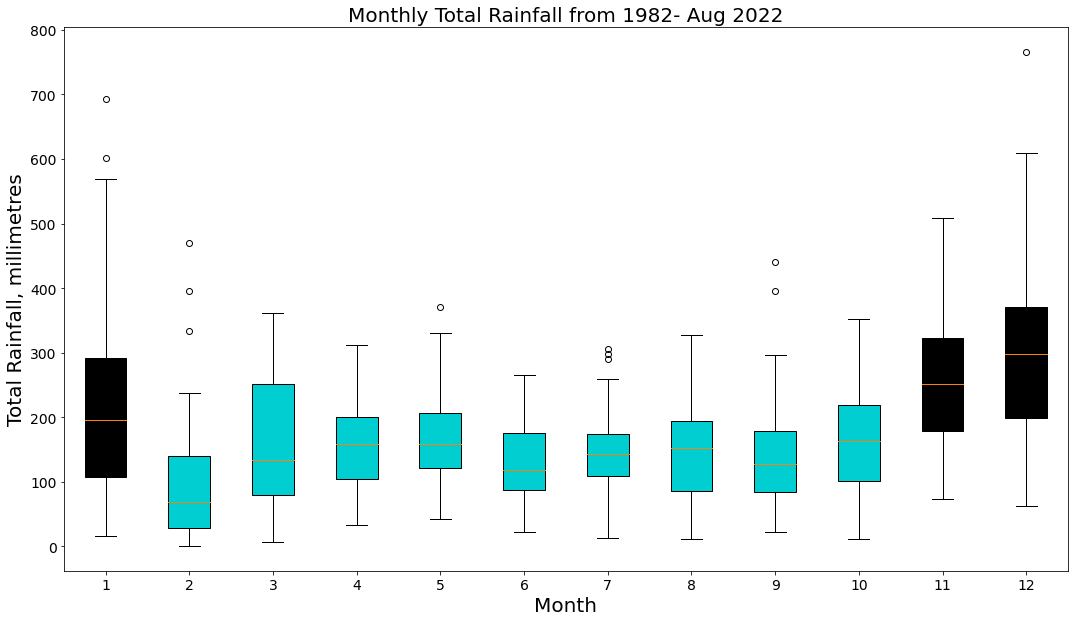

In [16]:
# Are there any outliers months in the dataset?

monthly_rainfall_dist = pd.DataFrame()

for i in range(1, 13):
    df = rainfall[rainfall['mth']==i]['total_rainfall'].reset_index().drop('month', axis=1).rename(columns={'total_rainfall':i})
    monthly_rainfall_dist = pd.concat([monthly_rainfall_dist, df], axis=1)

months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
monthly_rainfall_dist.rename(columns=months, inplace=True)
monthly_rainfall_dist.dropna(axis=0, inplace=True)

colors = ['black', 'darkturquoise', 'darkturquoise', 'darkturquoise', 'darkturquoise', 'darkturquoise', 'darkturquoise', 'darkturquoise', 'darkturquoise', 'darkturquoise', 'black', 'black']

plt.figure(figsize=(18, 10))
box=plt.boxplot(monthly_rainfall_dist, patch_artist=True)   # set patch_artist=True to change box colours
for patch, color in zip(box['boxes'], colors):   # To change box colours
    patch.set_facecolor(color)

plt.title('Monthly Rainfall Variability from 1982- Aug 2022');
plt.xlabel('Month', fontsize=20)
plt.ylabel('Total Rainfall, millimetres', fontsize=20)
plt.tick_params(axis='both', labelsize=14)
plt.title('Monthly Total Rainfall from 1982- Aug 2022', fontsize=20);


# There are no outliers in all the datasets as they have been found to be natural occurences.

### Nov/Dec/Jan are most likely to see the highest amount of rainfall every year but it is also wildly variable and unpredictable

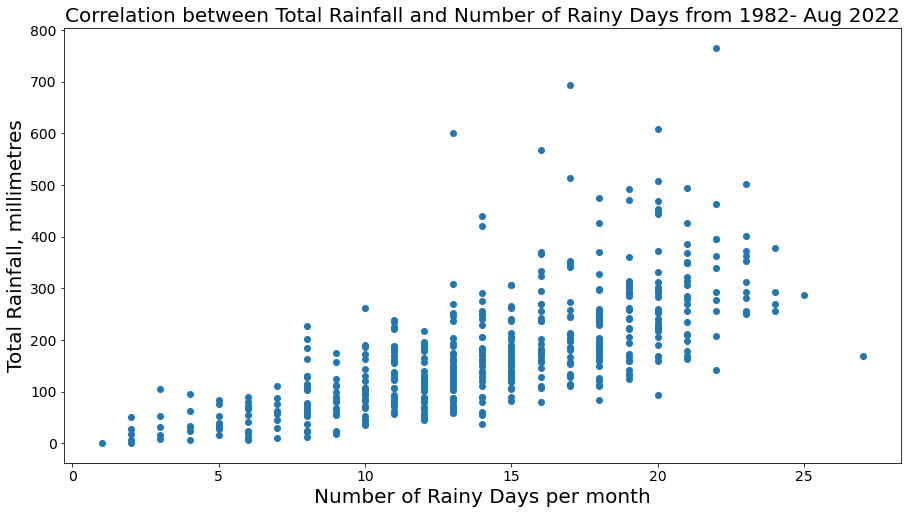

In [17]:
# Strong positive correlation between total_rainfall and number of rainy days

plt.figure(figsize=(15, 8))
plt.scatter(x=rainfall['no_of_rainy_days'], y=rainfall['total_rainfall'])
plt.xlabel('Number of Rainy Days per month', fontsize=20)
plt.ylabel('Total Rainfall, millimetres', fontsize=20)
plt.tick_params(axis='both', labelsize=14)
plt.title('Correlation between Total Rainfall and Number of Rainy Days from 1982- Aug 2022', fontsize=20);

### Strong positive correlation between total_rainfall and number of rainy days

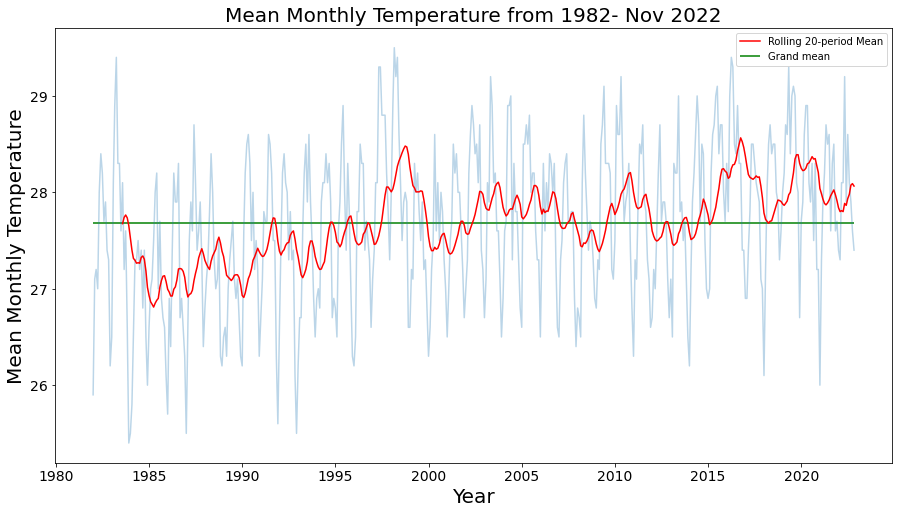

In [18]:
plt.figure(figsize=(15, 8))
plt.plot(humidity.index, humidity['mean_temp'], alpha=0.30)
rolling_mean = humidity['mean_temp'].rolling(20).mean()
grand_mean = humidity['mean_temp'].mean()
plt.plot(humidity.index, rolling_mean, '-', color='r', label='Rolling 20-period Mean')
plt.hlines(grand_mean, humidity.index[0], humidity.index[-1], colors='g', label='Grand mean')
plt.legend();
plt.xlabel('Year', fontsize=20)
plt.ylabel('Mean Monthly Temperature', fontsize=20)
plt.tick_params(axis='both', labelsize=14)
plt.title('Mean Monthly Temperature from 1982- Nov 2022', fontsize=20);

### Surface air temperatures have been rising over the last decade!

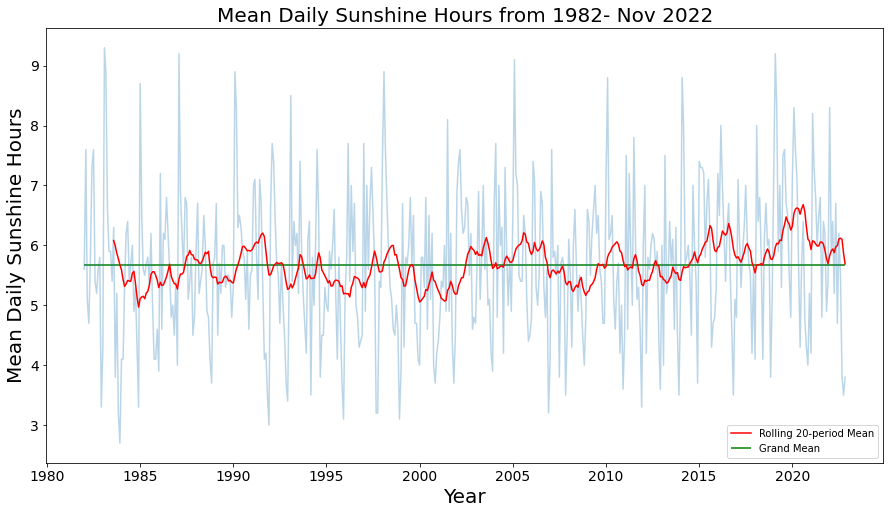

In [19]:
plt.figure(figsize=(15, 8))
plt.plot(humidity.index, humidity['mean_sunshine_hrs'], alpha=0.30)
rolling_mean = humidity['mean_sunshine_hrs'].rolling(20).mean()
grand_mean = humidity['mean_sunshine_hrs'].mean()
plt.plot(humidity.index, rolling_mean, '-', color='r', label='Rolling 20-period Mean')
plt.hlines(grand_mean, humidity.index[0], humidity.index[-1], colors='g', label='Grand Mean')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Mean Daily Sunshine Hours', fontsize=20)
plt.tick_params(axis='both', labelsize=14)
plt.title('Mean Daily Sunshine Hours from 1982- Nov 2022', fontsize=20);

### But daily sunshine hours hardly increased much...at most we saw a slightly higher frequency of 0.5hour more on average

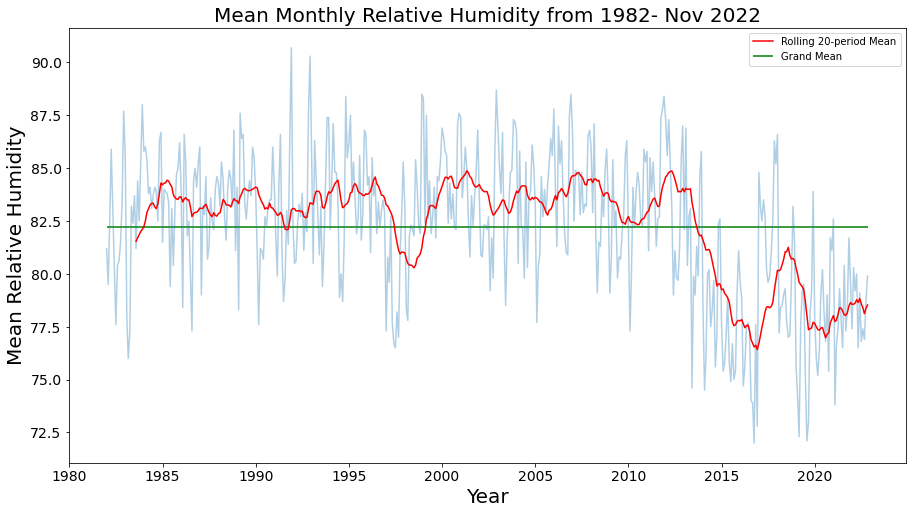

In [20]:
plt.figure(figsize=(15, 8))
plt.plot(humidity.index, humidity['mean_rh'], alpha=0.35)
rolling_mean = humidity['mean_rh'].rolling(20).mean()
plt.plot(humidity.index, rolling_mean, '-', color='r', label='Rolling 20-period Mean')
grand_mean = humidity['mean_rh'].mean()
plt.hlines(grand_mean, humidity.index[0], humidity.index[-1], colors='g', label='Grand Mean' )
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Mean Relative Humidity', fontsize=20)
plt.tick_params(axis='both', labelsize=14)
plt.title('Mean Monthly Relative Humidity from 1982- Nov 2022', fontsize=20);

### Air humidity has dropped drastically over the same period

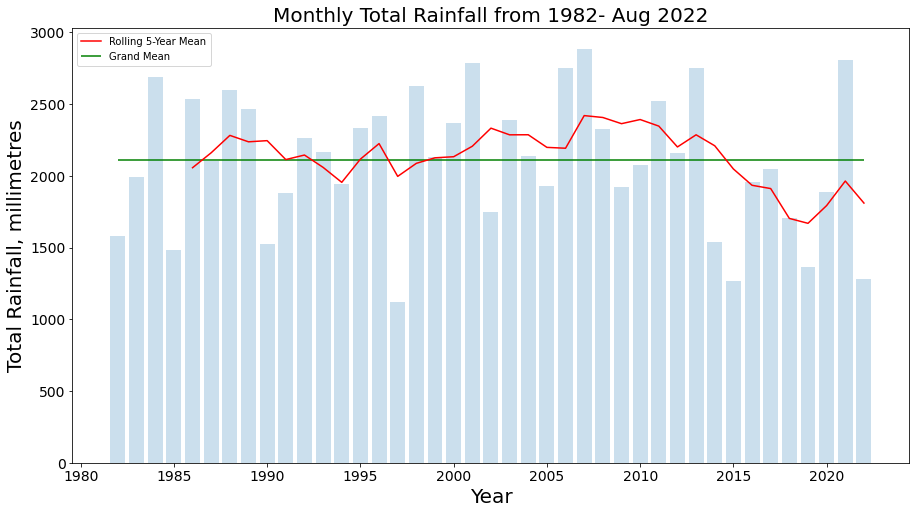

In [21]:
plt.figure(figsize=(15, 8))
annual_rainfall_series = rainfall.groupby('year')['total_rainfall'].sum()   # as seen here, total rainfall did fell between 2014-2022 
plt.bar(annual_rainfall_series.index, annual_rainfall_series, alpha=0.23)
rolling_mean = annual_rainfall_series.rolling(5).mean()
grand_mean = rainfall.groupby('year')['total_rainfall'].sum().mean()
plt.hlines(grand_mean, annual_rainfall_series.index[0], annual_rainfall_series.index[-1], colors='g', label='Grand Mean')
plt.plot(annual_rainfall_series.index, rolling_mean, '-', color='r', label='Rolling 5-Year Mean')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Rainfall, millimetres', fontsize=20)
plt.tick_params(axis='both', labelsize=14)
plt.title('Monthly Total Rainfall from 1982- Aug 2022', fontsize=20);


### Total rainfall has been on a downtrend…except for 2021 which was due to the La Nina phenomenon

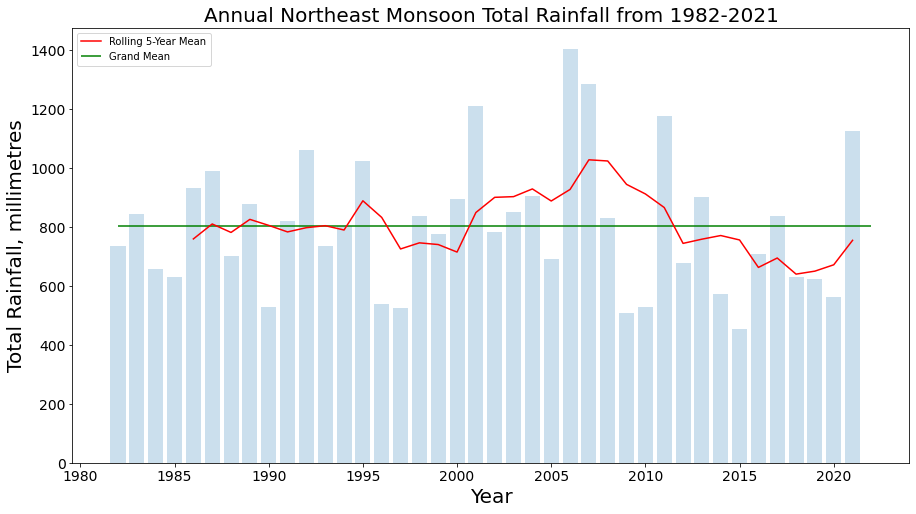

In [22]:
# Extract Total Rainfall for the heavier Northeast Monsoon Nov+Dec+Jan

nov_rainfall = rainfall[(rainfall['mth']==11)]['total_rainfall'].reset_index()
dec_rainfall = rainfall[(rainfall['mth']==12)]['total_rainfall'].reset_index()
jan_rainfall = rainfall[(rainfall['mth']==1)]['total_rainfall'].reset_index()
nov_dec_jan = nov_rainfall['total_rainfall'].add(dec_rainfall['total_rainfall']).add(jan_rainfall['total_rainfall'])
nov_dec_jan.index = [year for year in range(1982,2023)]

# Plot Northeast Monsoon total rainfall
plt.figure(figsize=(15, 8))
rolling_mean = nov_dec_jan.rolling(5).mean()
grand_mean = nov_dec_jan.mean()
plt.bar(nov_dec_jan.index, nov_dec_jan, alpha=0.23)
plt.plot(nov_dec_jan.index, rolling_mean, color='r', label='Rolling 5-Year Mean')
plt.hlines(grand_mean, nov_dec_jan.index[0], nov_dec_jan.index[-1], colors='g', label='Grand Mean')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Rainfall, millimetres', fontsize=20)
plt.tick_params(axis='both', labelsize=14)
plt.title('Annual Northeast Monsoon Total Rainfall from 1982-2021', fontsize=20);


### Even the heaviest Northeast Monsoon has also seen a sharp decline in total rainfall on average…except 2021

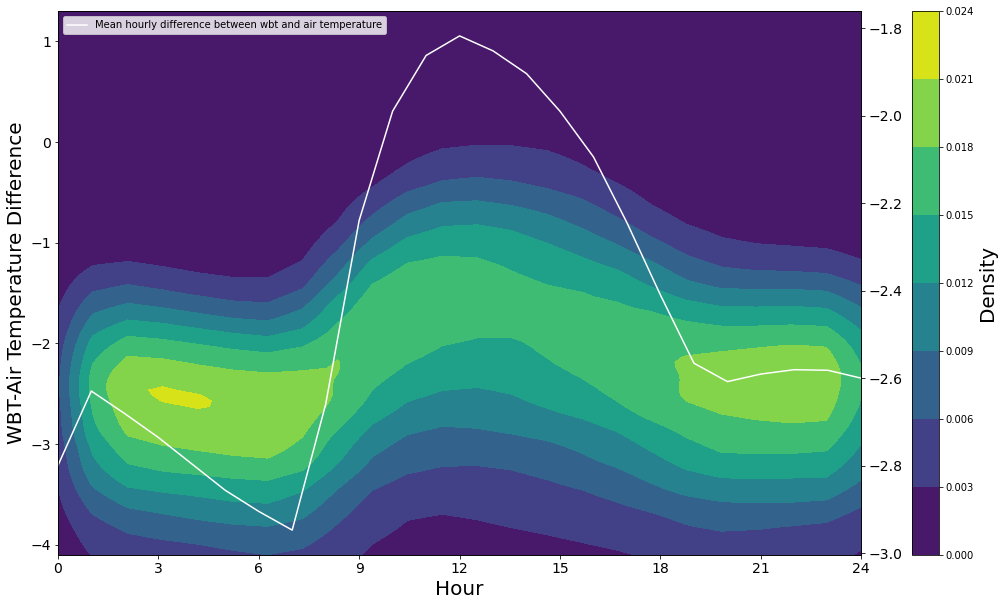

In [23]:
# Perform the KDE estimation
kde = gaussian_kde([wbt_with_air['wbt_time'], wbt_with_air['bulb_minus_air_temp']])

# Generate the x and y values for the plot
x_values = np.linspace(wbt_with_air['wbt_time'].min(), wbt_with_air['wbt_time'].max(), 24)
y_values = np.linspace(wbt_with_air['bulb_minus_air_temp'].quantile(0.05), wbt_with_air['bulb_minus_air_temp'].max(), 100)  #quantile=0.05 due to min()=12.6 which renders the chart not meaningfuk
X, Y = np.meshgrid(x_values, y_values)
coords = np.vstack([X.ravel(), Y.ravel()])

# Evaluate the KDE at the x and y values
Z = kde(coords).reshape(X.shape)

# Plot the results
fig, ax1 = plt.subplots(figsize=(18,10))
# plt.figure(figsize=(18, 10))
contour_plot = ax1.contourf(X, Y, Z)
ax1.set_xlabel('Hour', fontsize=20)
ax1.set_ylabel('WBT-Air Temperature Difference', fontsize=20)
ax1.set_xticks([])
ax1.tick_params(axis='both', labelsize=14)

# Add colorbar
cb = fig.colorbar(contour_plot)
cb.set_label("Density", fontsize=20)  # the more dense, the more humid the air is



# Comment-out this section to Add line plot of Mean hourly wbt-minus-air temperature
ax2 = ax1.twinx()
mean_bulb_minus_air_temp = wbt_with_air.groupby('wbt_time')['bulb_minus_air_temp'].mean()
ax2.plot(mean_bulb_minus_air_temp.index, mean_bulb_minus_air_temp, '-', color='white', label='Mean hourly difference between wbt and air temperature');
ax2.legend(loc='upper left')
ax2.set_xticks(np.arange(25, step=3))
ax2.tick_params(axis='both', labelsize=14);



### The most humid hours are most likely to be during the early morning and late evening-night times. 
### Between 10am-1pm is the window most likely to be least humid.
### In fact, 12-1pm is the optimal time to play during the Monsoon months

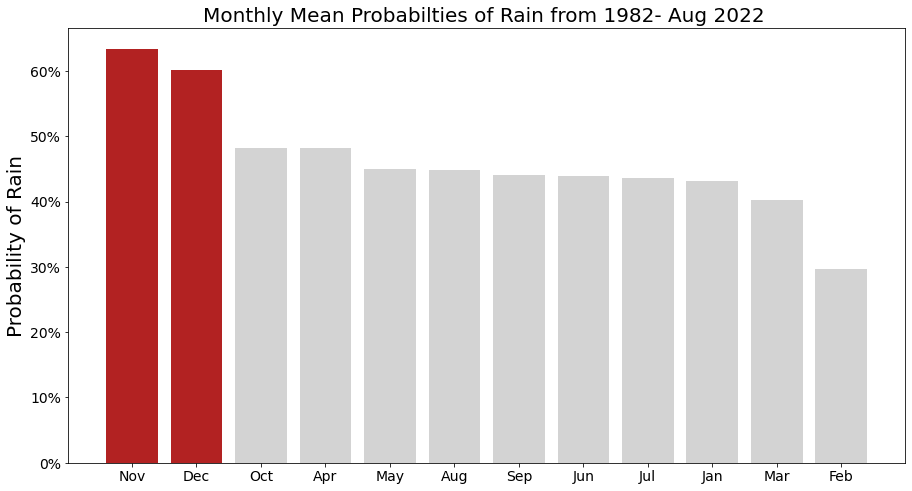

In [24]:
rain_chances = rainfall.groupby('mth')['monthly_probability_of_rain'].mean()
rain_chances.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sorted_rain_chances = rain_chances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(sorted_rain_chances.index, sorted_rain_chances, color=['firebrick', 'firebrick', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray', 'lightgray'])
ax.set_ylabel('Probability of Rain', fontsize=20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))  # Reason why using ax instead of plt is because plt doesnt have this format method 
ax.tick_params(axis='both', labelsize=14)
plt.title('Monthly Mean Probabilties of Rain from 1982- Aug 2022 ', fontsize=20);

# sorted_rain_chances

### November and December are most likely to rain with close to 60% chance

The correlation between mean relative humidity and monthly rain probability is 0.584621950889029


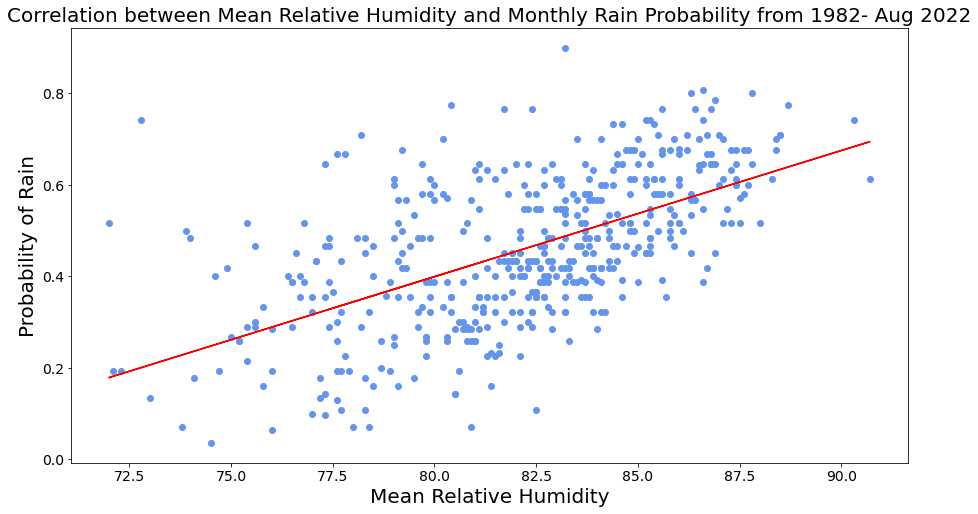

In [25]:
# Regression using all 488 Monthly Means of Relative Humidity
x = humidity[['mean_rh']][:-3]
y = rainfall[['monthly_probability_of_rain']]

reg = LinearRegression().fit(x, y)

plt.figure(figsize=(15, 8))
plt.scatter(x, y, color='cornflowerblue')
plt.plot(x, reg.predict(x), color='red')
plt.xlabel('Mean Relative Humidity', fontsize=20)
plt.ylabel('Probability of Rain', fontsize=20)
plt.tick_params(axis='both', labelsize=14)
plt.title('Correlation between Mean Relative Humidity and Monthly Rain Probability from 1982- Aug 2022', fontsize=20);

# Find correlation
corr = np.corrcoef(x['mean_rh'], y['monthly_probability_of_rain'])[0, 1]
print(f"The correlation between mean relative humidity and monthly rain probability is {corr}")

### The more humid air is, the higher the probability of rain

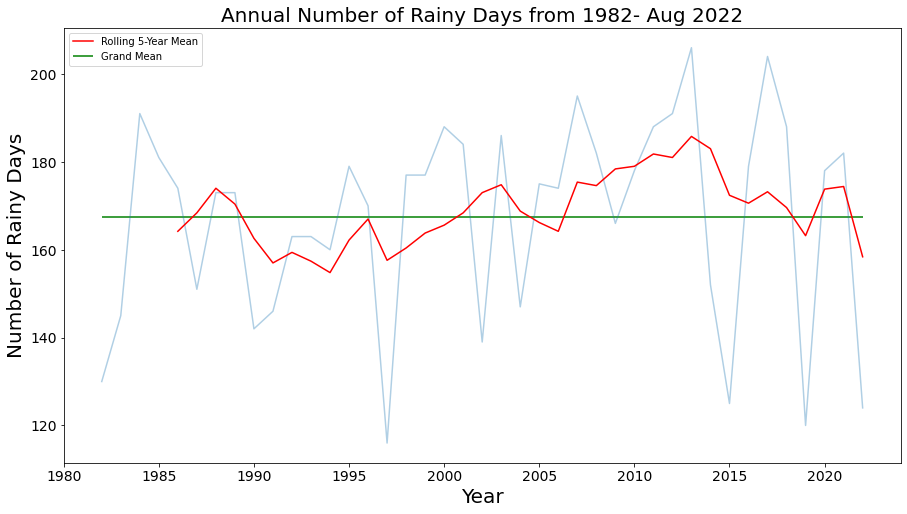

In [26]:
# Did the frequency of rain fall in tandem with the declines in rainfall in recent years? 

plt.figure(figsize=(15, 8))
annual_rain_days = rainfall.groupby('year')['no_of_rainy_days'].sum()
plt.plot(annual_rain_days.index, annual_rain_days, alpha=0.35)
rolling_mean = annual_rain_days.rolling(5).mean()
grand_mean = annual_rain_days.mean()
plt.plot(annual_rain_days.index, rolling_mean, color='r', label='Rolling 5-Year Mean')
plt.hlines(grand_mean,annual_rain_days.index[0], annual_rain_days.index[-1], colors='g', label='Grand Mean')
plt.legend()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Rainy Days', fontsize=20)
plt.tick_params(axis='both', labelsize=14)
plt.title('Annual Number of Rainy Days from 1982- Aug 2022', fontsize=20);

# Yes it did, the rolling average started to fall since 2012

### On average, we are starting to see less rainy days over the past seven years

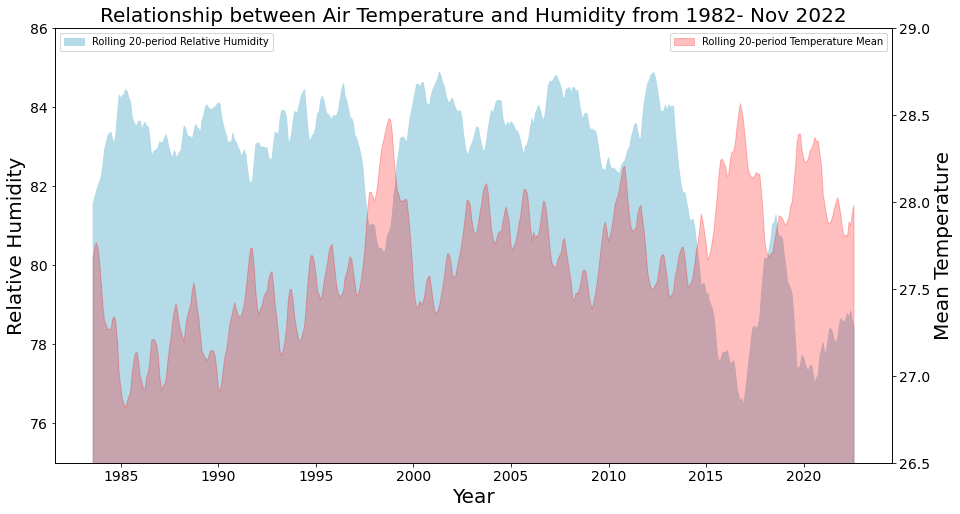

In [27]:
fig, ax1 = plt.subplots(figsize=(15,8))

rolling_temp_mean = humidity['mean_temp'][:-3].rolling(20).mean()
rolling_humidity_mean = humidity['mean_rh'][:-3].rolling(20).mean()
rolling_rainfall_mean = rainfall['total_rainfall'].rolling(20).mean()

ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Relative Humidity', fontsize=20)
ax1.fill_between(rolling_humidity_mean.index, rolling_humidity_mean, color='lightblue', alpha=0.9, label='Rolling 20-period Relative Humidity')
ax1.set_ylim(75,86)
ax1.tick_params(axis='both', labelsize=14)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Mean Temperature', fontsize=20)
ax2.fill_between(rolling_temp_mean.index, rolling_temp_mean, color='red', alpha=0.25, label='Rolling 20-period Temperature Mean')
ax2.set_ylim(26.5,29)
ax2.tick_params(axis='both', labelsize=14)
ax2.legend(loc='upper right')
plt.title('Relationship between Air Temperature and Humidity from 1982- Nov 2022', fontsize=20);


# Comment-out this section to include Monthly Rainfall rolling average plot
# ax3 = ax1.twinx()
# ax3.plot(rolling_temp_mean.index, rolling_rainfall_mean, '-', color='b', label='Rolling 20-period Rainfall Mean')
# ax3.set_yticks([])
# ax3.set_yticklabels([])
# ax3.legend(loc='upper center');


### Each time air temperatures spiked significantly, humidity fell sharply

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

- Avoid the Northeast Monsoon months (Nov/Dec/Jan) if you are playing tennis.
- If you want to take your best chance at the weather, book the 12pm-1pm slot.
- On average, least likely hours to rain are during 10am-1pm.
- Global warming is real!
- Rising air temperatures and falling humidity are a potent combination that increases the risk of heat injuries due to increased dehydration.
- BE SURE TO DRINK MORE WATER!
